# Extract EEG signals from a dataset for seizure detection


# Import Libraries


In [3]:
import numpy as np
import os
import pandas
import matplotlib
import matplotlib.pyplot as plt

import mne
from mne.filter import notch_filter


# Locate Data

https://mne.tools/stable/auto_tutorials/intro/10_overview.html#sphx-glr-auto-tutorials-intro-10-overview-py


In [4]:
# Set data location
DEV_DATA_FOLDER = "E:/edf/dev"


# Set absence file names
ABSENCE_FILES_NAMES = []
with open(r"processed_data\absence\absence_files.txt", "r") as f:
    for i in f.readlines():
        ABSENCE_FILES_NAMES.append(DEV_DATA_FOLDER + i[:-1])


In [7]:
raw = mne.io.read_raw_edf(ABSENCE_FILES_NAMES[0])


Extracting EDF parameters from E:\edf\dev\02_tcp_le\033\00003306\s001_2006_10_11\00003306_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


## Load Data


In [8]:
raw.load_data()


Reading 0 ... 356499  =      0.000 ...  1425.996 secs...


Measurement date,"October 11, 2006 14:54:02 GMT"
Experimenter,Unknown
Participant,00003306
Digitized points,Not available
Good channels,41 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


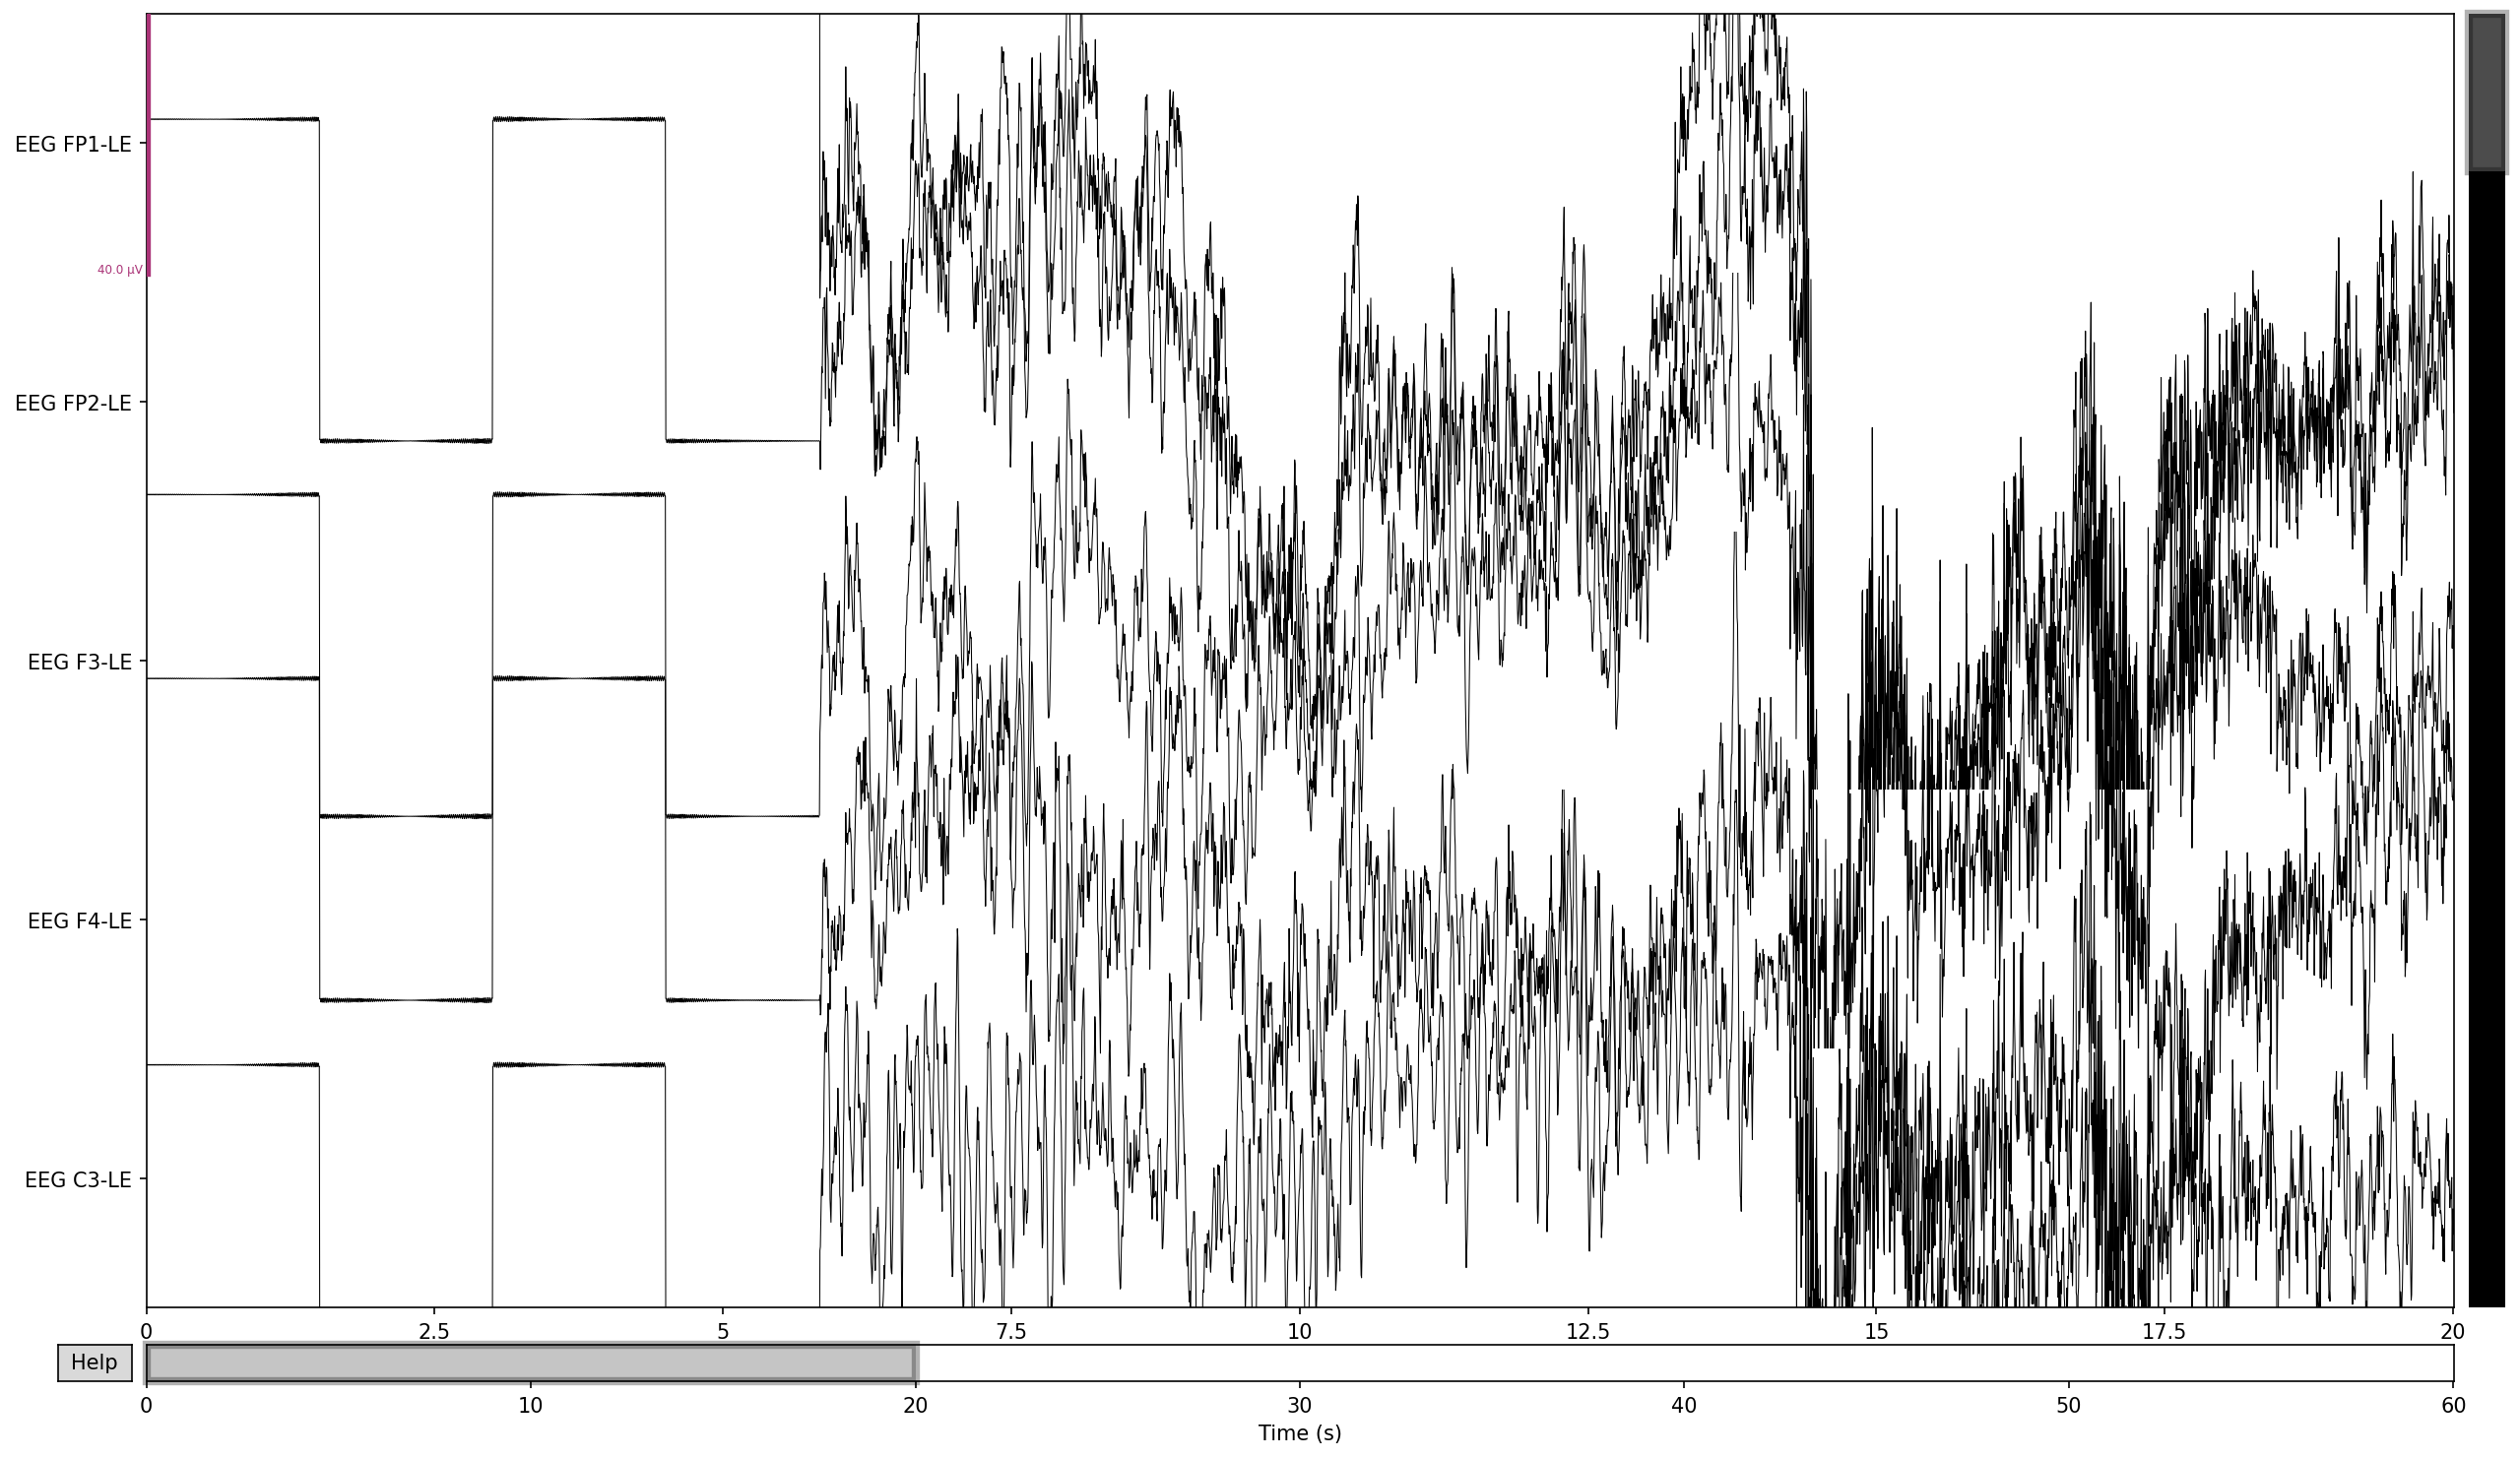

In [34]:
%matplotlib qt
raw.plot(duration=20, n_channels=5)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)



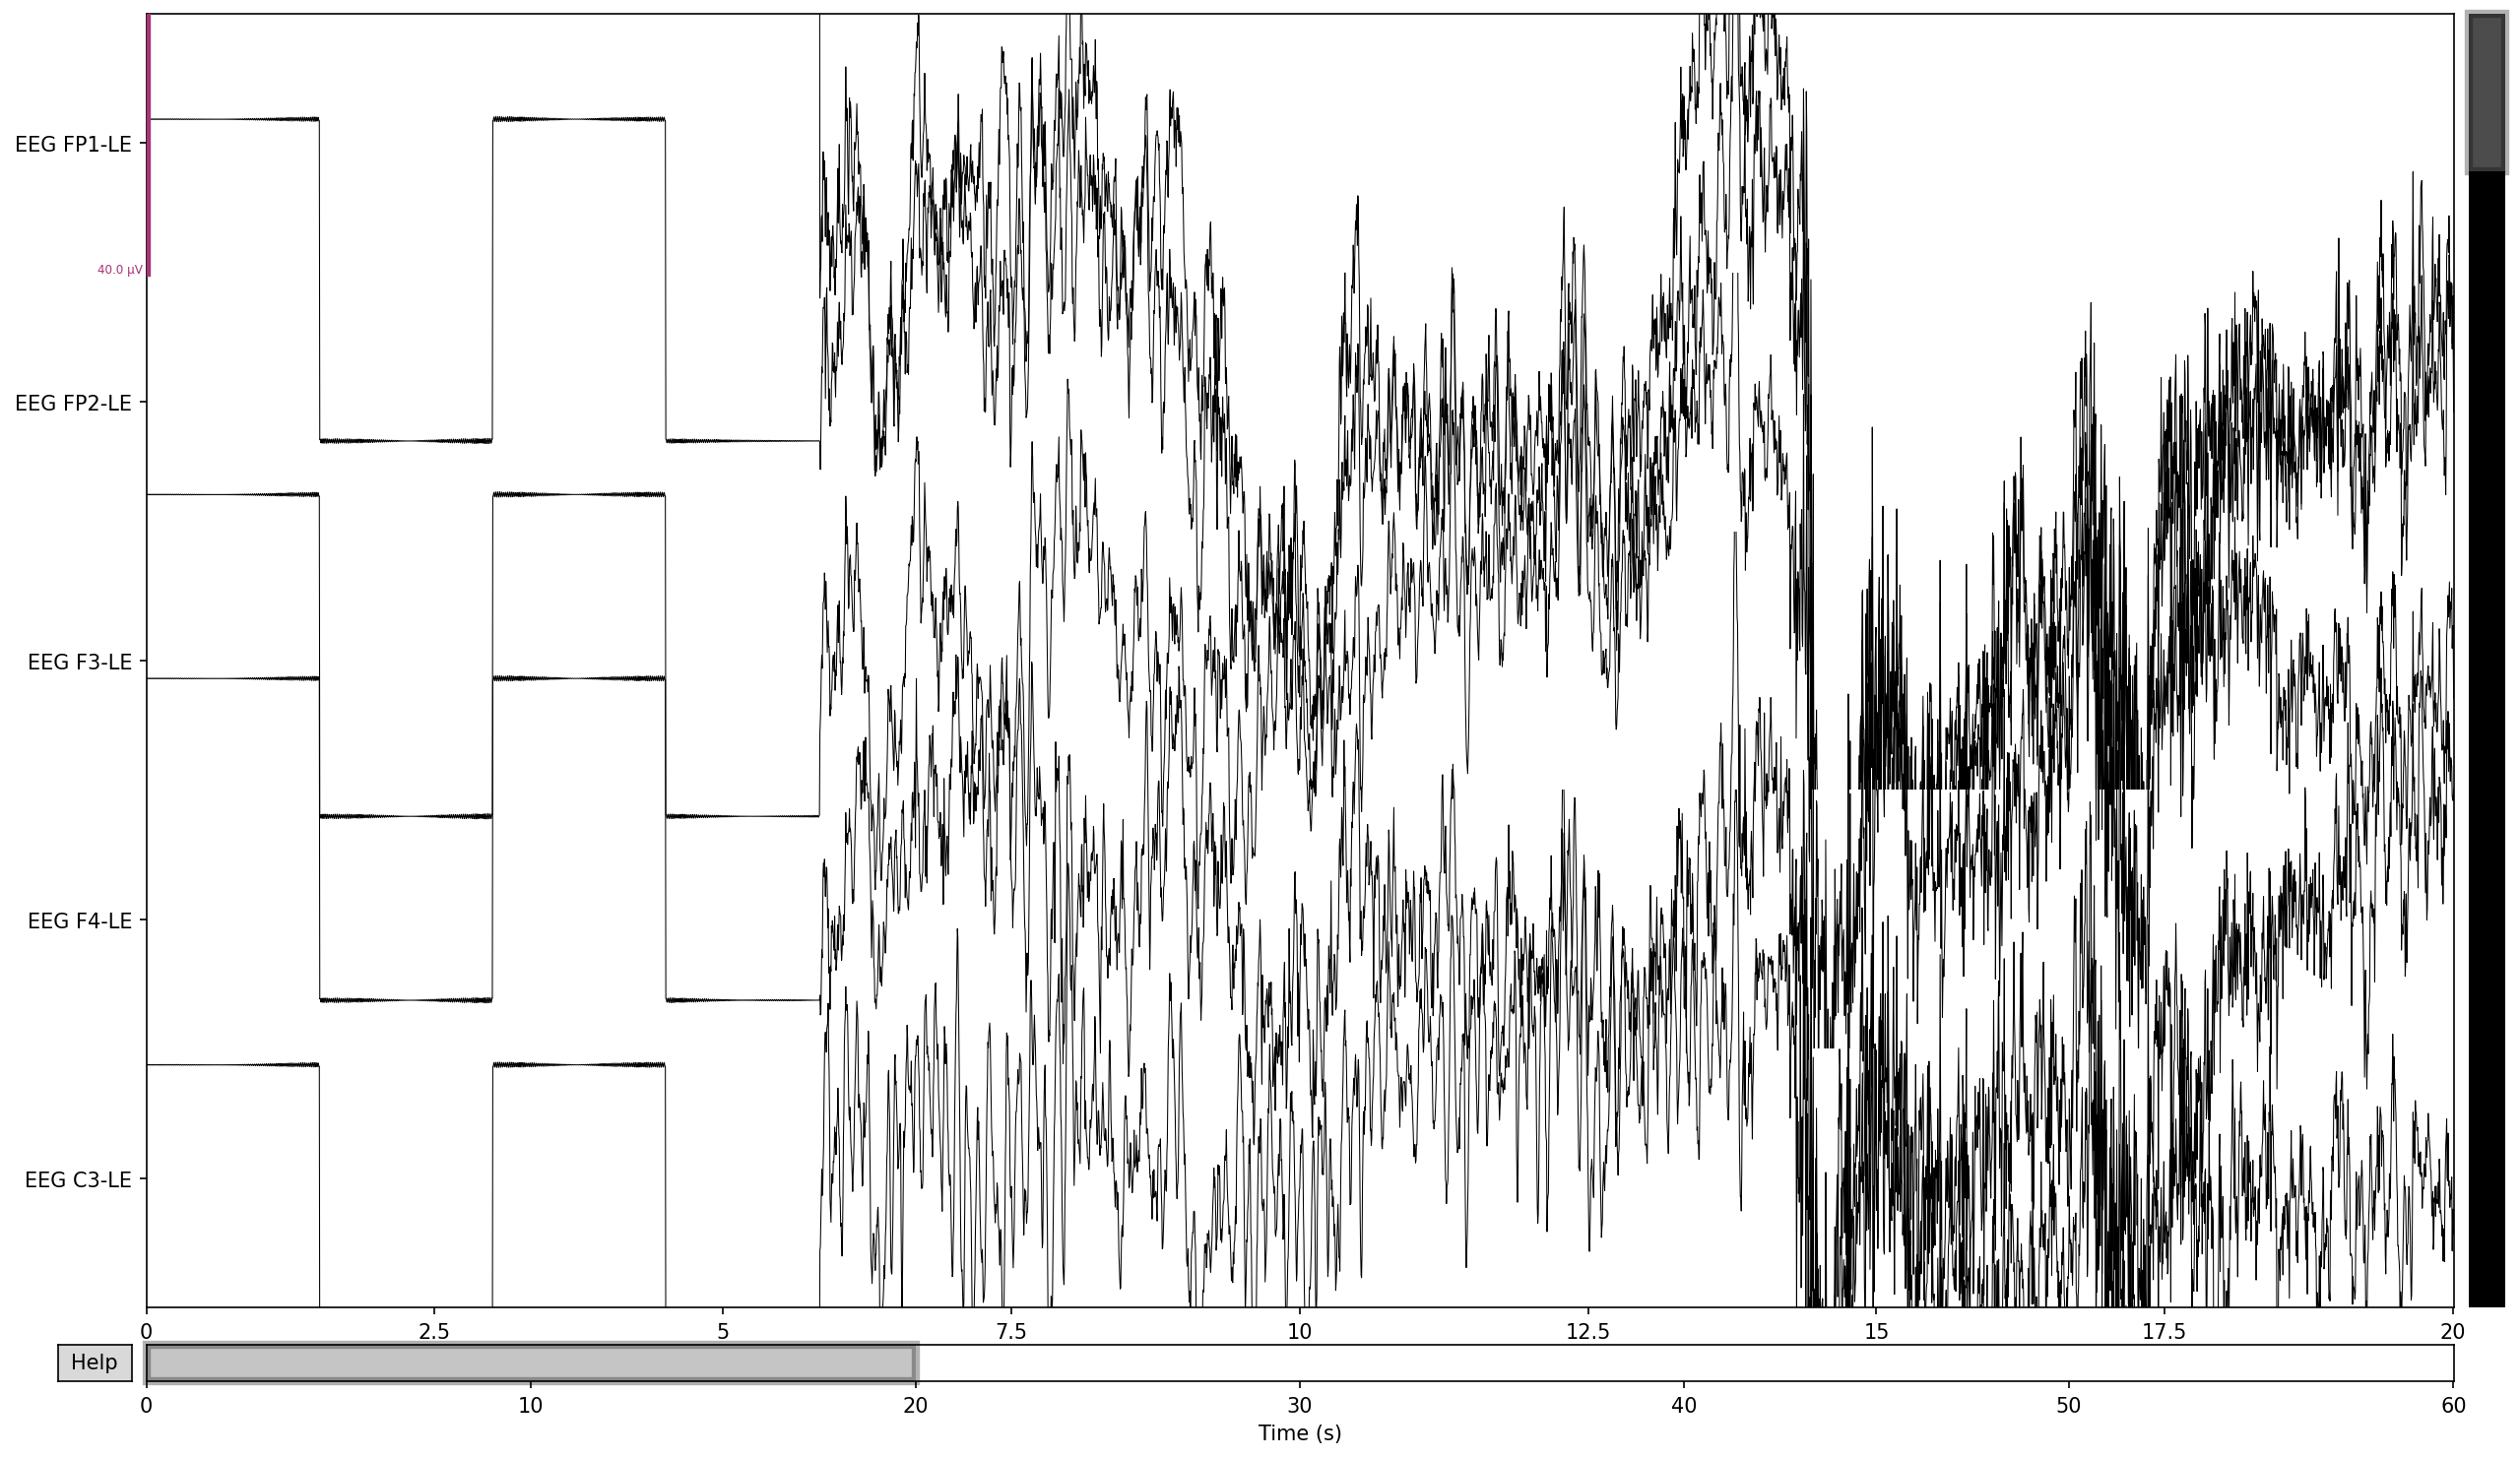

In [36]:
data = raw.get_data()
info = raw.info
frequency = raw.info["sfreq"]

raw.notch_filter(60)

raw.plot(duration=20, n_channels=5)

# Next -
# Plan window
# Find out which channels are for ABSZ,
#   Extract and use only those channels


Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 59 events and 500 original time points ...
0 bad epochs dropped


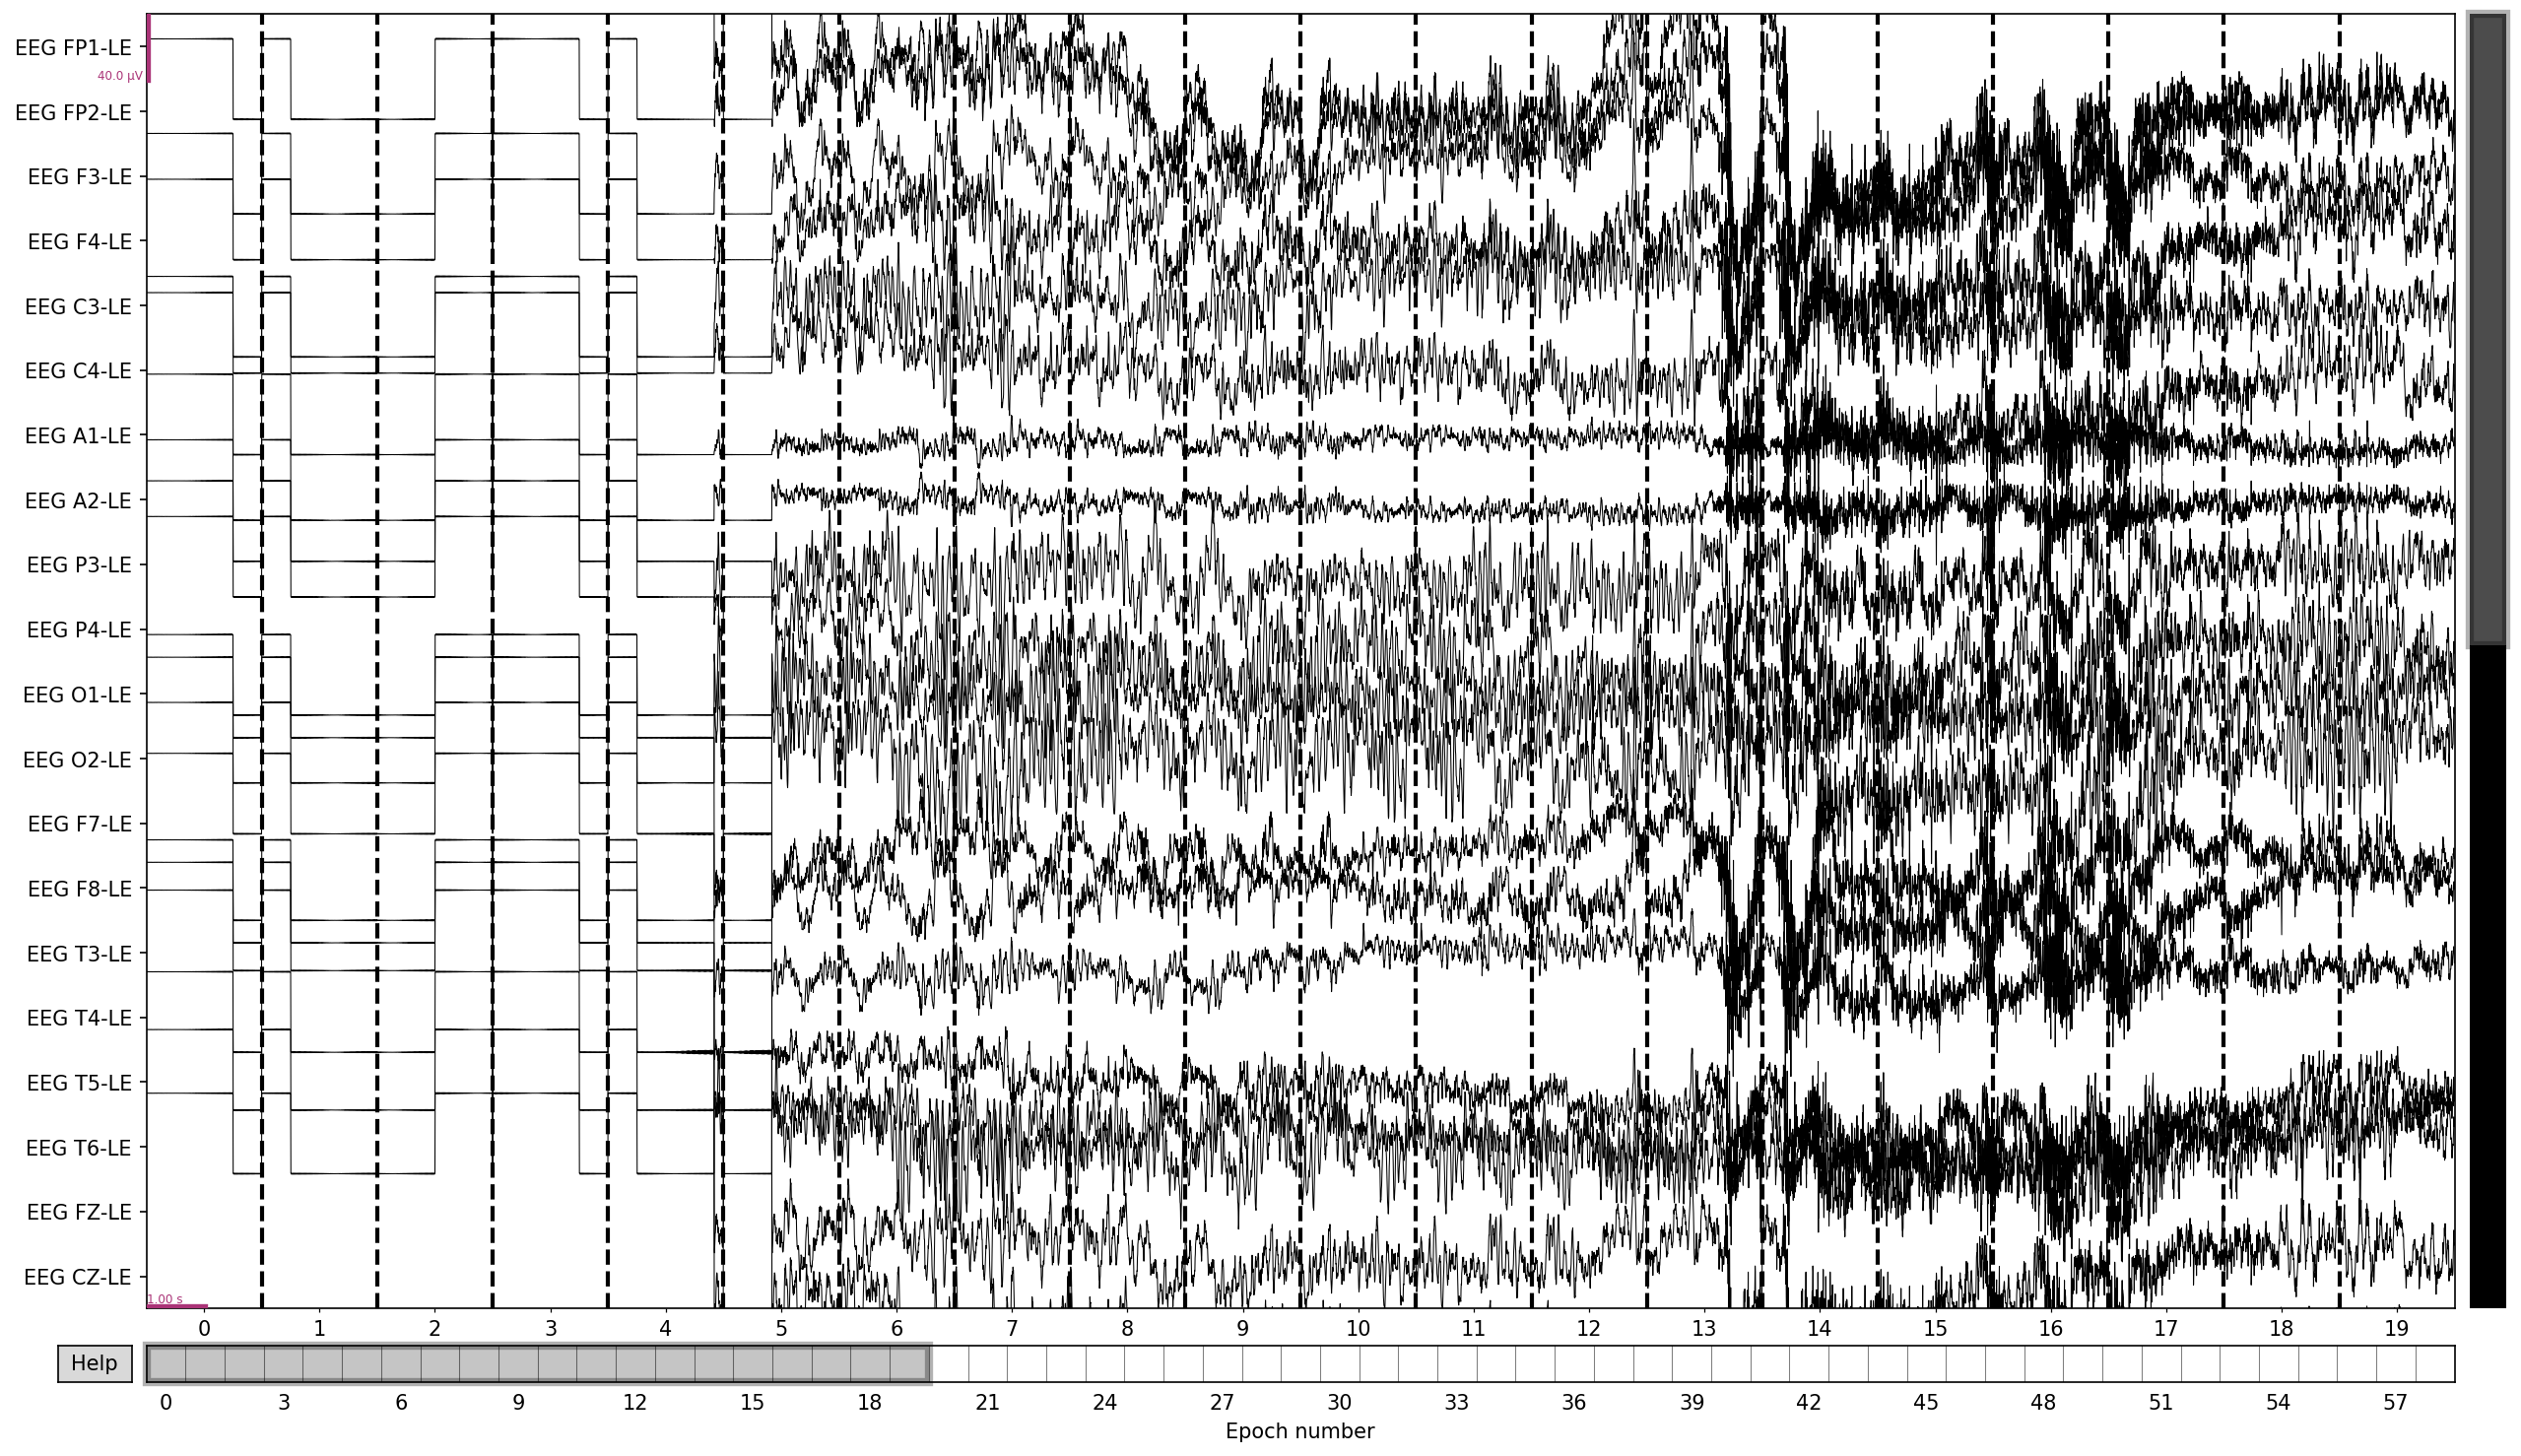

In [30]:
epochs = mne.make_fixed_length_epochs(raw, duration=2, overlap=1, preload=True)
epochs.plot(n_epochs=20)
